# Import Libraries

In [1]:
#Used Machine Learning Day 2 example 5
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

In [3]:
#import wine CSVs
red_csv = "Data/winequality-red.csv"
white_csv = "Data/winequality-white.csv"

In [4]:
red = pd.read_csv(red_csv)
white= pd.read_csv(white_csv)

red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Scale Red Wine Data 

In [5]:
#assign data to X and y
X = red[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]
y = red["quality"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1599, 11) (1599, 1)


In [6]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [7]:
#scale Data
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [8]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
number_list = np.array(y_train)

(unique, counts) = np.unique(number_list, return_counts=True)
frequencies = np.asarray((unique, counts)).T

frequencies

array([[  3,   8],
       [  4,  40],
       [  5, 511],
       [  6, 478],
       [  7, 149],
       [  8,  13]], dtype=int64)

In [10]:
number_list = np.array(y_test)

(unique, counts) = np.unique(number_list, return_counts=True)
frequencies = np.asarray((unique, counts)).T

frequencies

array([[  3,   2],
       [  4,  13],
       [  5, 170],
       [  6, 160],
       [  7,  50],
       [  8,   5]], dtype=int64)

# K Nearest Neighbors - Red

k: 1, Train/Test Score: 1.000/0.632
k: 3, Train/Test Score: 0.773/0.560
k: 5, Train/Test Score: 0.711/0.603
k: 7, Train/Test Score: 0.676/0.590
k: 9, Train/Test Score: 0.658/0.588
k: 11, Train/Test Score: 0.651/0.583
k: 13, Train/Test Score: 0.652/0.588
k: 15, Train/Test Score: 0.649/0.575
k: 17, Train/Test Score: 0.640/0.570
k: 19, Train/Test Score: 0.639/0.560


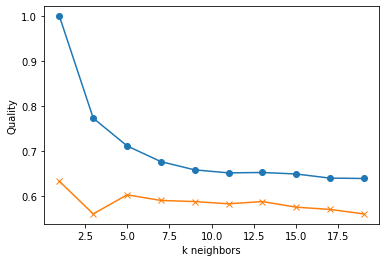

In [11]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train.ravel())
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Quality")
plt.show()

# Scale White Wine Data

In [12]:
#assign data to X and y

X = white[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]]
y = white["quality"].values.reshape(-1, 1)
print(X.shape, y.shape)

(4898, 11) (4898, 1)


In [13]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [14]:
#scale Data
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [15]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
number_list = np.array(y_train)

(unique, counts) = np.unique(number_list, return_counts=True)
frequencies = np.asarray((unique, counts)).T

frequencies

array([[   3,   15],
       [   4,  122],
       [   5, 1093],
       [   6, 1648],
       [   7,  660],
       [   8,  131],
       [   9,    4]], dtype=int64)

In [17]:
number_list = np.array(y_test)

(unique, counts) = np.unique(number_list, return_counts=True)
frequencies = np.asarray((unique, counts)).T

frequencies

array([[  3,   5],
       [  4,  41],
       [  5, 364],
       [  6, 550],
       [  7, 220],
       [  8,  44],
       [  9,   1]], dtype=int64)

# K Nearest Neighbors - White

k: 1, Train/Test Score: 1.000/0.605
k: 3, Train/Test Score: 0.786/0.528
k: 5, Train/Test Score: 0.701/0.540
k: 7, Train/Test Score: 0.662/0.540
k: 9, Train/Test Score: 0.648/0.524
k: 11, Train/Test Score: 0.629/0.526
k: 13, Train/Test Score: 0.616/0.535
k: 15, Train/Test Score: 0.605/0.544
k: 17, Train/Test Score: 0.595/0.537
k: 19, Train/Test Score: 0.591/0.534


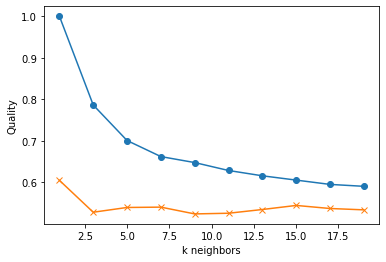

In [20]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train.ravel())
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Quality")
plt.show()